<h1>Exploratory Data Analysis</h1>
<h4>Geeting to know your dataset</h4>

<h5>Installing Dependencies</h5>

In [4]:
#Data Manipulation and Handling
import pandas as pd
import numpy as np
import os
#Visualization: 
import matplotlib.pyplot as plt
import seaborn as sns
#For Image-Type Dataset: 
from PIL import Image
import cv2
from collections import Counter
from tqdm import tqdm
#Warning Filter: 
import warnings


plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

<h5>Setting up Directories for the raw images</h5>

In [34]:
BASE_DIR = '/home/nayan/ml/brain_tumor_classification/data/raw'
BINARY_DIR = '/home/nayan/ml/brain_tumor_classification/data/raw/binary'
MULTICLASS_DIR = '/home/nayan/ml/brain_tumor_classification/data/raw/multiclass'

# Create results directory
RESULTS_DIR = 'ml/brain_tumor_classification/results/figures'
os.makedirs(RESULTS_DIR, exist_ok=True)

print(f"Base Directory: {BASE_DIR}")
print(f"2-Class Directory: {BINARY_DIR}")
print(f"4-Class Directory: {MULTICLASS_DIR}")
print(f"Results Directory: {RESULTS_DIR}")

Base Directory: /home/nayan/ml/brain_tumor_classification/data/raw
2-Class Directory: /home/nayan/ml/brain_tumor_classification/data/raw/binary
4-Class Directory: /home/nayan/ml/brain_tumor_classification/data/raw/multiclass
Results Directory: ml/brain_tumor_classification/results/figures


<h5>Defining Functions to Get Image Path, Open Image, Image Information</h5>

In [35]:
def get_image_path(directory):
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff'}
    image_paths = []
    
    for root, dirs, files in os.walk(directory):
        for file in files:
            if os.path.splitext(file.lower())[1] in image_extensions:
                image_paths.append(os.path.join(root, file))
    
    return image_paths

def load_image_safely(image_path):
    try:
        img = Image.open(image_path)
        return np.array(img)
    except Exception as e:
        print(f"Error loading {image_path}: {e}")
        return None

def get_image_info(image_path):
    try:
        img = Image.open(image_path)
        img_array = np.array(img)
        
        return {
            'path': image_path,
            'width': img.width,
            'height': img.height,
            'mode': img.mode,
            'format': img.format,
            'size_kb': os.path.getsize(image_path) / 1024,
            'shape': img_array.shape,
            'channels': len(img_array.shape) if len(img_array.shape) == 3 else 1
        }
    except Exception as e:
        return None

<h5>Analysis of our Binary Class</h5>

In [36]:
print(" Analyzing Two Classes (Yes or No) \n")
BINARY_SUBDIR = [d for d in os.listdir(BINARY_DIR) if os.path.isdir(BINARY_DIR)]
print(BINARY_SUBDIR)
BINARY_COUNT = {}
for class_name in BINARY_SUBDIR:
    class_path = os.path.join(BINARY_DIR, class_name)
    images = get_image_path(class_path)
    BINARY_COUNT[class_name] = len(images)
    print(f"  {class_name}: {len(images)} images")
print(f"\nTotal images in 2-class dataset: {sum(BINARY_COUNT.values())}")

 Analyzing Two Classes (Yes or No) 

['yes', 'no']
  yes: 4159 images
  no: 2025 images

Total images in 2-class dataset: 6184


<h5>Analysis of our Multi Class</h5>

In [39]:
print("Analyzing Four Classes (Types) \n")
MULTICLASS_SUBDIR = [d for d in os.listdir(MULTICLASS_DIR) if os.path.isdir(MULTICLASS_DIR)]
print(MULTICLASS_SUBDIR)
MULTICLASS_COUNT = {}
for class_name in MULTICLASS_SUBDIR:
    class_path = os.path.join(MULTICLASS_DIR, class_name)
    images = get_image_path(class_path)
    MULTICLASS_COUNT[class_path] = len(images)
    print(f" {class_name}: {len(images)} images")
print(f"\nTotal Images in 4 Class Dataset: {sum(BINARY_COUNT.values())}")

Analyzing Four Classes (Types) 

['glioma_tumor', 'pituitary_tumor', 'meningioma_tumor', 'normal']
 glioma_tumor: 901 images
 pituitary_tumor: 844 images
 meningioma_tumor: 913 images
 normal: 438 images

Total Images in 4 Class Dataset: 6184


<h5>Visualizing Class Distribution for both Binary and MultiClass</h5>

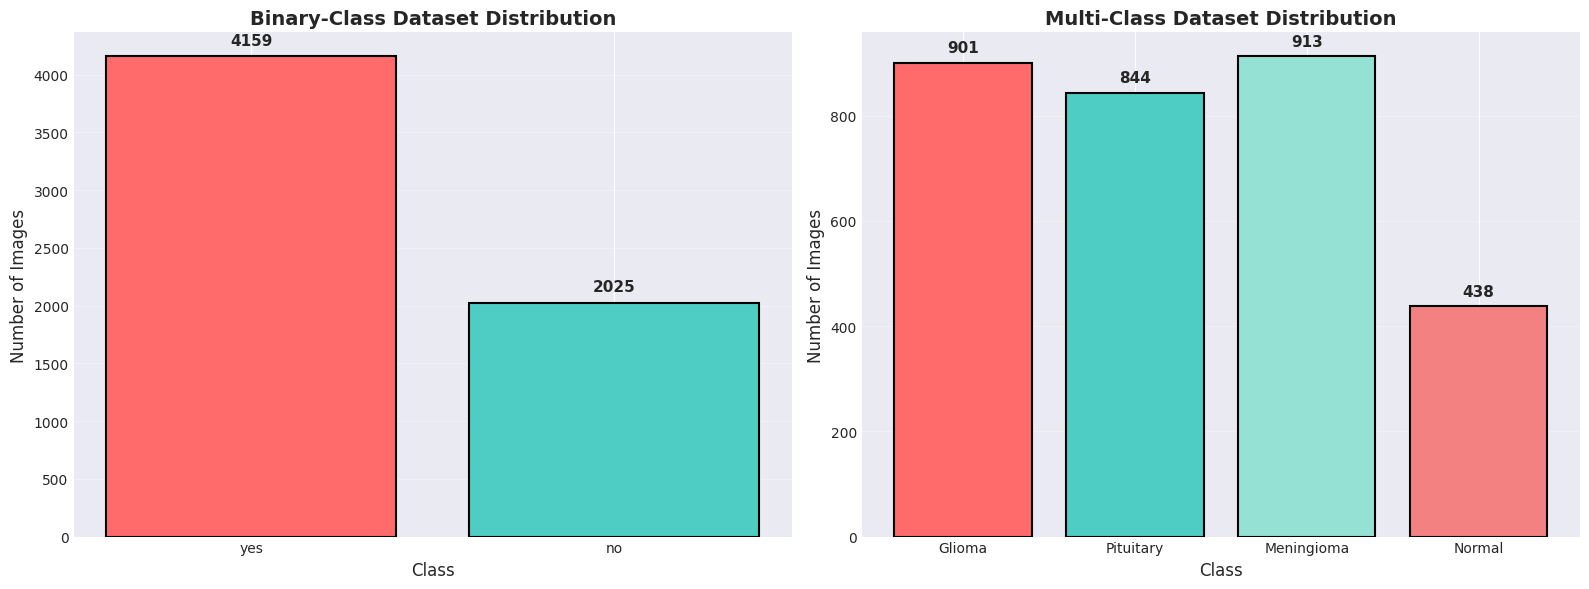

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 2-Class Distribution
axes[0].bar(BINARY_COUNT.keys(), BINARY_COUNT.values(), 
            color=['#FF6B6B', '#4ECDC4'], edgecolor='black', linewidth=1.5)
axes[0].set_title('Binary-Class Dataset Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Number of Images', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (k, v) in enumerate(BINARY_COUNT.items()):
    axes[0].text(i, v + 100, str(v), ha='center', fontweight='bold', fontsize=11)

# 4-Class Distribution with cleaner labels
# First, let's create shorter, cleaner labels
clean_labels = []
for label in MULTICLASS_COUNT.keys():
    # Remove the long path-like structure and extract just the class name
    clean_label = label.split('_')[-2] + '_' + label.split('_')[-1] if '_' in label else label
    # Or manually set them:
    if 'glioma' in label.lower():
        clean_labels.append('Glioma')
    elif 'meningioma' in label.lower():
        clean_labels.append('Meningioma')
    elif 'pituitary' in label.lower() or 'pituatary' in label.lower():
        clean_labels.append('Pituitary')
    elif 'normal' in label.lower():
        clean_labels.append('Normal')
    else:
        clean_labels.append(label)

axes[1].bar(range(len(MULTICLASS_COUNT)), MULTICLASS_COUNT.values(), 
            color=['#FF6B6B', '#4ECDC4', '#95E1D3', '#F38181'], 
            edgecolor='black', linewidth=1.5)
axes[1].set_title('Multi-Class Dataset Distribution', fontsize=14, fontweight='bold')  # Fixed typo
axes[1].set_xlabel('Class', fontsize=12)
axes[1].set_ylabel('Number of Images', fontsize=12)
axes[1].set_xticks(range(len(clean_labels)))
axes[1].set_xticklabels(clean_labels, rotation=0, ha='center')  # No rotation, centered
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(MULTICLASS_COUNT.values()):
    axes[1].text(i, v + 20, str(v), ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, 'class_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()

<H5>Calculating Class Imbalance</H5>

In [56]:
print("\n" + "=" * 80)
print("CLASS IMBALANCE ANALYSIS")
print("=" * 80)

# 2-Class Imbalance
print("\n2-Class Dataset:")
TOTAL_BINARY = sum(BINARY_COUNT.values())
for class_name, count in BINARY_COUNT.items():
    percentage = (count / TOTAL_BINARY) * 100
    print(f"  {class_name}: {percentage:.2f}%")

BINARY_IMBALANCE_RATIO = max(BINARY_COUNT.values()) / min(BINARY_COUNT.values())
print(f"  Imbalance Ratio: {BINARY_IMBALANCE_RATIO:.2f}:1")

if BINARY_IMBALANCE_RATIO > 1.5:
    print("  Dataset is imbalanced - consider using class weights or resampling")
else:
    print("  ✓ Dataset is relatively balanced")

# 4-Class Imbalance
print("\n4-Class Dataset:")
TOTAL_MULTICLASS = sum(MULTICLASS_COUNT.values())
for class_name, count in MULTICLASS_COUNT.items():
    percentage = (count / TOTAL_MULTICLASS) * 100
    print(f"  {class_name}: {percentage:.2f}%")

MULTICLASS_IMABALANCE_RATIO = max(MULTICLASS_COUNT.values()) / min(MULTICLASS_COUNT.values())
print(f"  Imbalance Ratio: {MULTICLASS_IMABALANCE_RATIO:.2f}:1")

if MULTICLASS_IMABALANCE_RATIO > 1.5:
    print("Dataset is imbalanced - consider using class weights or resampling")
else:
    print("Dataset is relatively balanced")


CLASS IMBALANCE ANALYSIS

2-Class Dataset:
  yes: 67.25%
  no: 32.75%
  Imbalance Ratio: 2.05:1
  Dataset is imbalanced - consider using class weights or resampling

4-Class Dataset:
  /home/nayan/ml/brain_tumor_classification/data/raw/multiclass/glioma_tumor: 29.10%
  /home/nayan/ml/brain_tumor_classification/data/raw/multiclass/pituitary_tumor: 27.26%
  /home/nayan/ml/brain_tumor_classification/data/raw/multiclass/meningioma_tumor: 29.49%
  /home/nayan/ml/brain_tumor_classification/data/raw/multiclass/normal: 14.15%
  Imbalance Ratio: 2.08:1
Dataset is imbalanced - consider using class weights or resampling


<h5>Sample Images Analysis</h5>

In [50]:
# Analyze a sample from 4-class dataset (more diverse)
sample_size = 500  # Analyze 500 random images for speed
all_image_paths = []
for class_name in MULTICLASS_SUBDIR:
    class_path = os.path.join(MULTICLASS_DIR, class_name)
    all_image_paths.extend(get_image_paths(class_path))

# Sample random images
np.random.seed(42)
sampled_paths = np.random.choice(all_image_paths, 
                                 min(sample_size, len(all_image_paths)), 
                                 replace=False)

# Collect image information
image_info_list = []
for img_path in tqdm(sampled_paths, desc="Processing images"):
    info = get_image_info(img_path)
    if info:
        image_info_list.append(info)

# Create DataFrame
df_images = pd.DataFrame(image_info_list)

print(f"\nAnalyzed {len(df_images)} images")
print("\nImage Properties Summary:")
print(df_images[['width', 'height', 'size_kb', 'channels']].describe())

Processing images: 100%|██████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 466.84it/s]



Analyzed 500 images

Image Properties Summary:
       width  height     size_kb  channels
count  500.0   500.0  500.000000     500.0
mean   256.0   256.0   19.813826       3.0
std      0.0     0.0    2.835418       0.0
min    256.0   256.0   11.159180       3.0
25%    256.0   256.0   18.047119       3.0
50%    256.0   256.0   19.693359       3.0
75%    256.0   256.0   21.642334       3.0
max    256.0   256.0   31.258789       3.0


<h5>Visualizing the Image Analysis</h5>

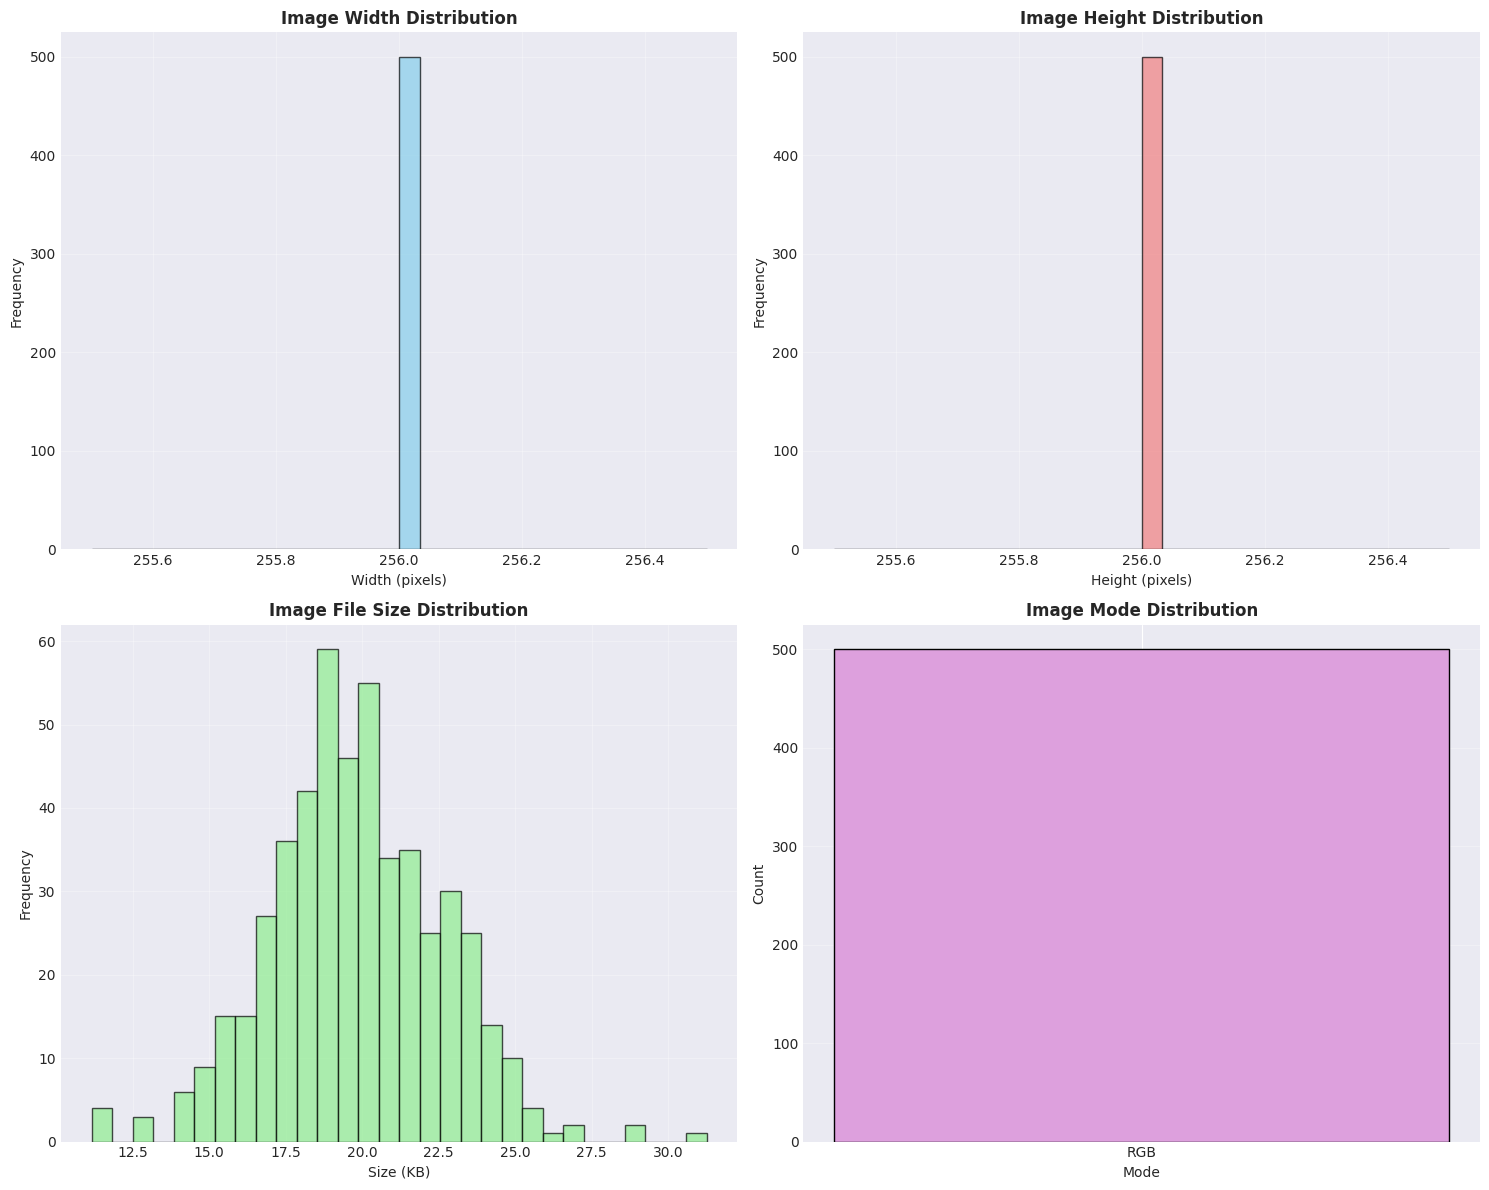

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Image Dimensions
axes[0, 0].hist(df_images['width'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Image Width Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Width (pixels)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(alpha=0.3)

axes[0, 1].hist(df_images['height'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Image Height Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Height (pixels)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(alpha=0.3)

# File Size
axes[1, 0].hist(df_images['size_kb'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Image File Size Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Size (KB)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(alpha=0.3)

# Image Modes
mode_counts = df_images['mode'].value_counts()
axes[1, 1].bar(mode_counts.index, mode_counts.values, color='plum', edgecolor='black')
axes[1, 1].set_title('Image Mode Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Mode')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, 'image_properties.png'), dpi=300, bbox_inches='tight')
plt.show()

<h5>Checking sample images from each class</h5>


DISPLAYING SAMPLE IMAGES


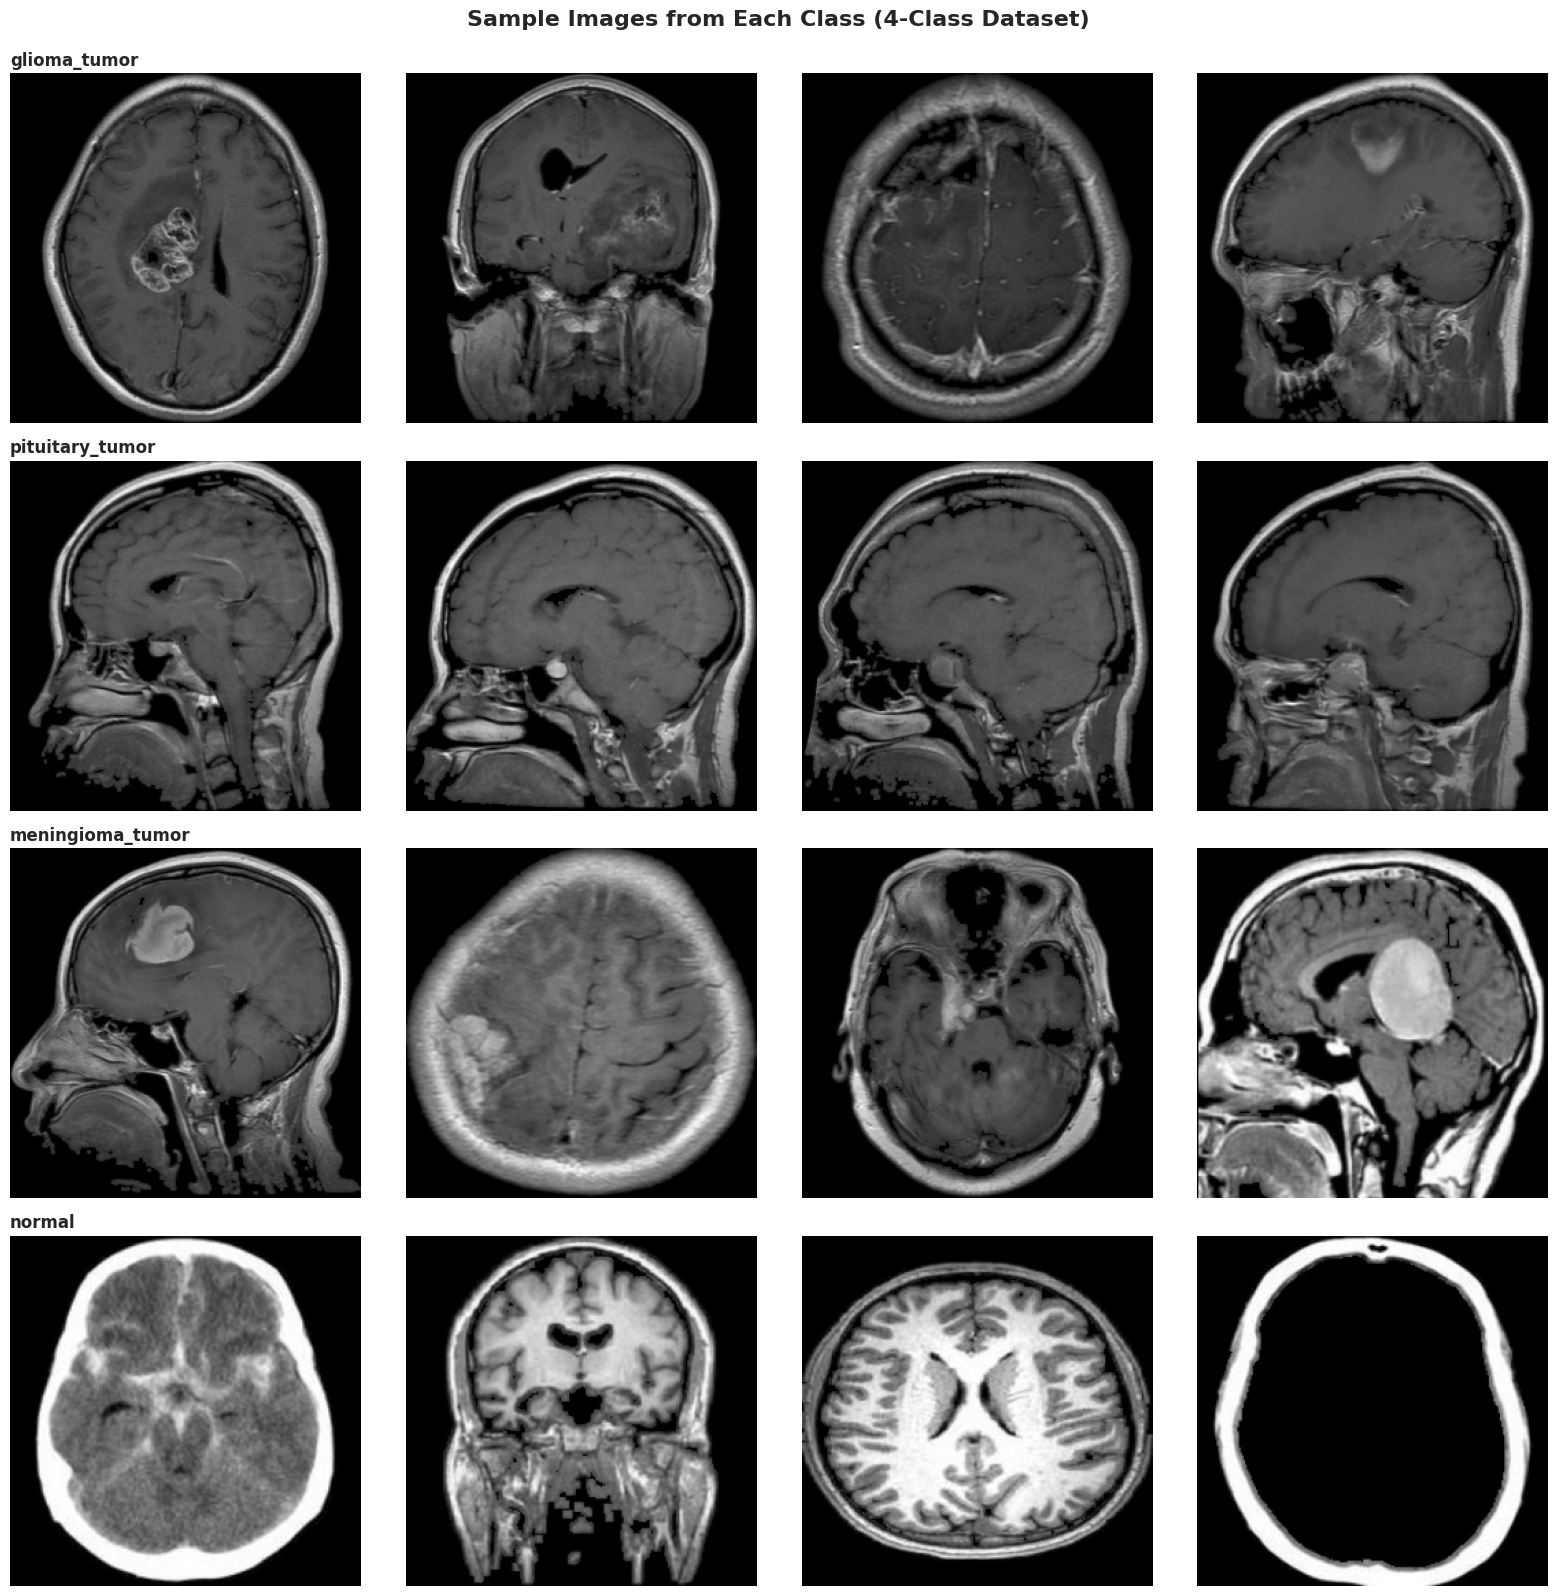

In [52]:
print("\n" + "=" * 80)
print("DISPLAYING SAMPLE IMAGES")
print("=" * 80)

fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('Sample Images from Each Class (4-Class Dataset)', 
             fontsize=16, fontweight='bold', y=0.995)

for idx, class_name in enumerate(MULTICLASS_SUBDIR):
    class_path = os.path.join(MULTICLASS_DIR, class_name)
    class_images = get_image_paths(class_path)
    
    # Sample 4 random images from each class
    sample_images = np.random.choice(class_images, min(4, len(class_images)), replace=False)
    
    for i, img_path in enumerate(sample_images):
        img = load_image_safely(img_path)
        if img is not None:
            axes[idx, i].imshow(img, cmap='gray')
            axes[idx, i].axis('off')
            if i == 0:
                axes[idx, i].set_title(f'{class_name}', 
                                      fontweight='bold', fontsize=12, loc='left')

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, 'sample_images_4class.png'), dpi=300, bbox_inches='tight')
plt.show()

<h5>Sampling 50 Images to calculate Pixel Intensity among the 4 Classes</h5>

Processing normal: 100%|████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 105.44it/s]


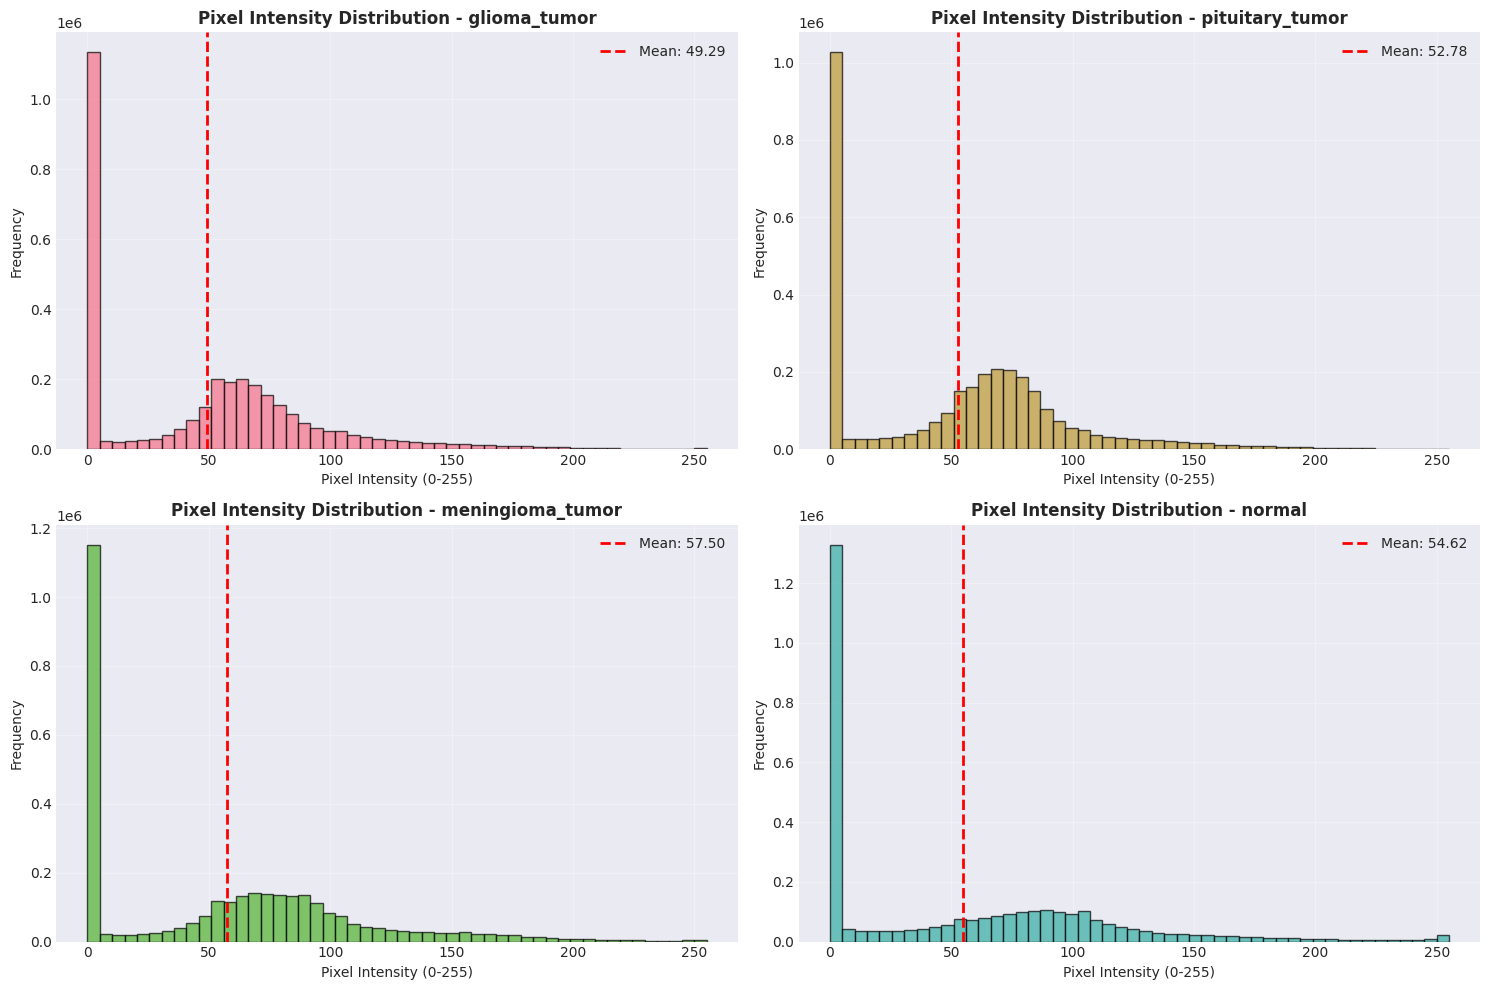

In [53]:
intensity_data = {class_name: [] for class_name in MULTICLASS_SUBDIR}

for class_name in MULTICLASS_SUBDIR:
    class_path = os.path.join(MULTICLASS_DIR, class_name)
    class_images = get_image_paths(class_path)
    
    # Sample 50 images per class
    sample_images = np.random.choice(class_images, min(50, len(class_images)), replace=False)
    
    for img_path in tqdm(sample_images, desc=f"Processing {class_name}"):
        img = load_image_safely(img_path)
        if img is not None:
            # Convert to grayscale if needed
            if len(img.shape) == 3:
                img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            intensity_data[class_name].extend(img.flatten())

# Plot intensity distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, (class_name, intensities) in enumerate(intensity_data.items()):
    axes[idx].hist(intensities, bins=50, color=f'C{idx}', alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'Pixel Intensity Distribution - {class_name}', fontweight='bold')
    axes[idx].set_xlabel('Pixel Intensity (0-255)')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.3)
    
    mean_intensity = np.mean(intensities)
    axes[idx].axvline(mean_intensity, color='red', linestyle='--', 
                     linewidth=2, label=f'Mean: {mean_intensity:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, 'pixel_intensity_distributions.png'), 
            dpi=300, bbox_inches='tight')
plt.show()

<h5>File Format Pie Chart</h5>


FILE FORMAT ANALYSIS

File formats found:
  JPEG: 500 files


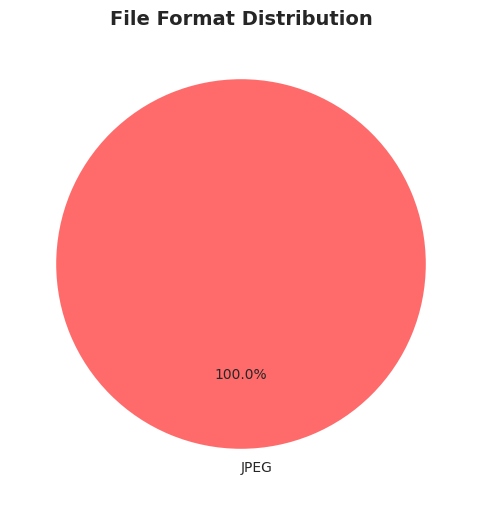

In [54]:
print("\n" + "=" * 80)
print("FILE FORMAT ANALYSIS")
print("=" * 80)

format_counts = df_images['format'].value_counts()
print("\nFile formats found:")
for fmt, count in format_counts.items():
    print(f"  {fmt}: {count} files")

# Visualize
plt.figure(figsize=(8, 6))
plt.pie(format_counts.values, labels=format_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['#FF6B6B', '#4ECDC4', '#95E1D3'])
plt.title('File Format Distribution', fontsize=14, fontweight='bold')
plt.savefig(os.path.join(RESULTS_DIR, 'file_format_distribution.png'), 
            dpi=300, bbox_inches='tight')
plt.show()

<h5>Final EDA Summary</h5>

In [61]:
print("\n" + "=" * 80)
print("EDA SUMMARY REPORT")
print("=" * 80)

print("\n DATASET OVERVIEW:")
print(f"  • Total images (2-class): {sum(BINARY_COUNT.values())}")
print(f"  • Total images (4-class): {sum(MULTICLASS_COUNT.values())}")

print("\n IMAGE PROPERTIES:")
print(f"  • Average dimensions: {df_images['width'].mean():.0f}x{df_images['height'].mean():.0f} pixels")
print(f"  • Average file size: {df_images['size_kb'].mean():.2f} KB")
print(f"  • Most common format: {df_images['format'].mode()[0]}")

print("\n CLASS BALANCE:")
print(f"  • 2-class imbalance ratio: {BINARY_IMBALANCE_RATIO:.2f}:1")
print(f"  • 4-class imbalance ratio: {MULTICLASS_IMABALANCE_RATIO:.2f}:1")

print("\n RECOMMENDATIONS:")
if MULTICLASS_IMABALANCE_RATIO > 1.5:
    print("  • Use class weights during training")
    print("  • Consider data augmentation for minority classes")
else:
    print("  • Dataset is relatively balanced")

print("  • Standardize image dimensions before training (e.g., 224x224)")
print("  • Apply normalization to pixel values (0-1 range)")
print("  • Use data augmentation to improve model generalization")

print("\nEDA COMPLETE!")
print(f"All visualizations saved to: {RESULTS_DIR}")


EDA SUMMARY REPORT

 DATASET OVERVIEW:
  • Total images (2-class): 6184
  • Total images (4-class): 3096

 IMAGE PROPERTIES:
  • Average dimensions: 256x256 pixels
  • Average file size: 19.81 KB
  • Most common format: JPEG

 CLASS BALANCE:
  • 2-class imbalance ratio: 2.05:1
  • 4-class imbalance ratio: 2.08:1

 RECOMMENDATIONS:
  • Use class weights during training
  • Consider data augmentation for minority classes
  • Standardize image dimensions before training (e.g., 224x224)
  • Apply normalization to pixel values (0-1 range)
  • Use data augmentation to improve model generalization

EDA COMPLETE!
All visualizations saved to: ml/brain_tumor_classification/results/figures
